In [ ]:
import pandas as pd

# Create a list of drone IDs
# drone_ids = [11, 12, 13, 14, 15, 16, 17, 18, 19]
drone_ids = [11, 12, 13, 14, 15, 16, 17, 18]

# Create an empty dictionary to store the dataframes
df_dict = {}

# Loop through the drone IDs, generate filenames, and read the CSVs
for drone_id in drone_ids:
    filename = f'/home/yanyew/webots_sim/path logs/RUN 1, SAFMC 1 CONFIG 2/CF{drone_id}_drone_path.csv'
    df_dict[f'df_drone_{drone_id}'] = pd.read_csv(filename)


In [42]:
# Create empty lists to store x and y values for each drone
x_values = []
y_values = []

# Iterate over the dictionary of dataframes
for drone_id, df in df_dict.items():
    x, y = df.iloc[:, 0].to_numpy(), df.iloc[:, 1].to_numpy()
    x_values.append(x)
    y_values.append(y)

# Now x_values and y_values contain lists of x and y coordinates for each drone


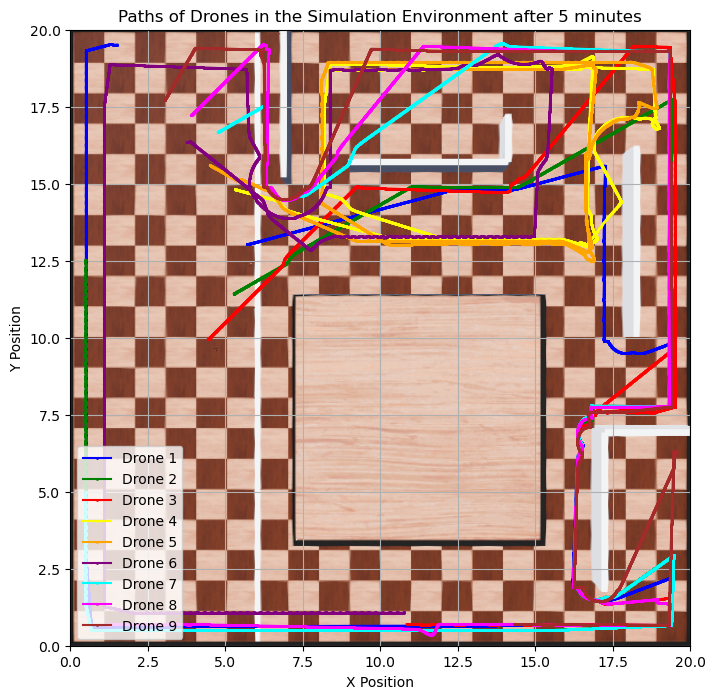

In [43]:
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('/home/yanyew/webots_sim/SAFMC 2.png')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("Paths of Drones in the Simulation Environment after 5 minutes")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

# Overlay the image
ax.imshow(img, extent=[0, 20, 0, 20], aspect='auto')  # Adjust `extent` to match plot range

# Define colors for each drone's path
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown']

# Plot each drone's path on top of the image
for i, (x, y) in enumerate(zip(x_values, y_values)):
    ax.plot(x, y, label=f"Drone {i+1}", color=colors[i], linestyle='-', marker='o', markersize=1)

# Fix axes scales to range from 0 to 20
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

# Add a legend and grid
ax.legend(loc='lower left')
ax.grid(True)

# Show the plot
plt.show()
